In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Outputs of the 10 neurons (before training):
Neuron 0 (Digit 0): 0.1213
Neuron 1 (Digit 1): 0.0967
Neuron 2 (Digit 2): 0.1010
Neuron 3 (Digit 3): 0.0919
Neuron 4 (Digit 4): 0.0994
Neuron 5 (Digit 5): 0.1135
Neuron 6 (Digit 6): 0.0879
Neuron 7 (Digit 7): 0.0975
Neuron 8 (Digit 8): 0.0812
Neuron 9 (Digit 9): 0.1095

Predicted class: 0
Correct class: 5

Error in the output layer (Predicted - Target):
Neuron 0 (Digit 0): 0.1213
Neuron 1 (Digit 1): 0.0967
Neuron 2 (Digit 2): 0.1010
Neuron 3 (Digit 3): 0.0919
Neuron 4 (Digit 4): 0.0994
Neuron 5 (Digit 5): -0.8865
Neuron 6 (Digit 6): 0.0879
Neuron 7 (Digit 7): 0.0975
Neuron 8 (Digit 8): 0.0812
Neuron 9 (Digit 9): 0.1095


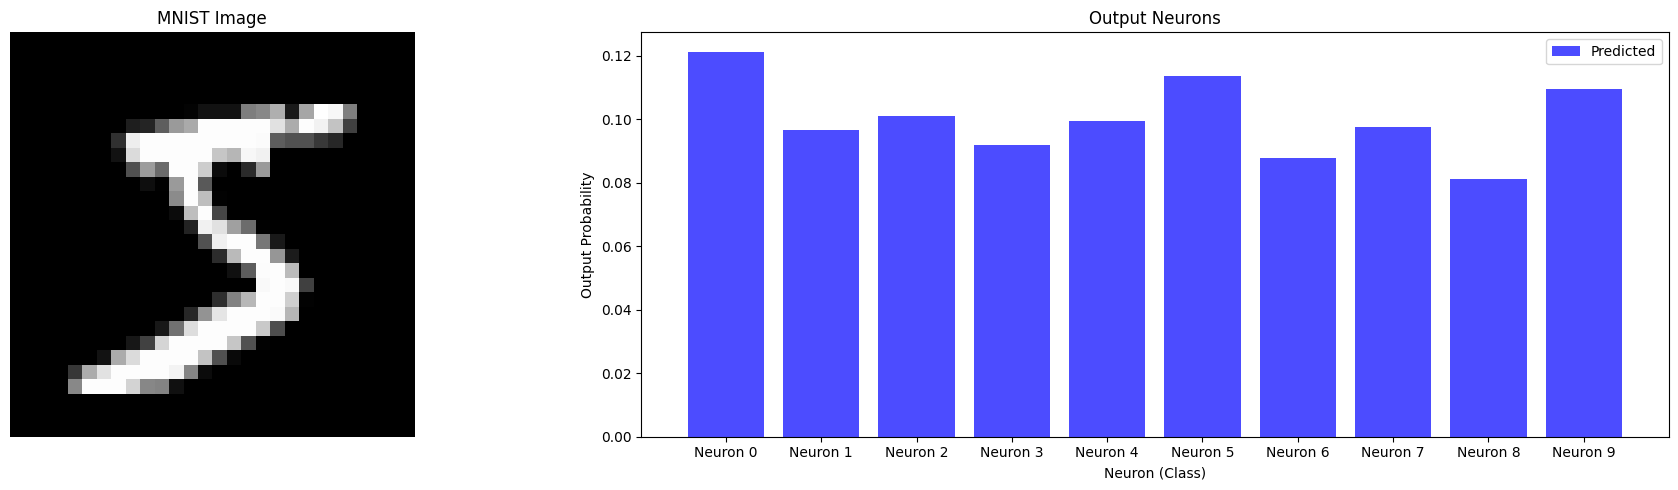

In [27]:
# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0  # Normalize and flatten input
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode targets

# Select a single MNIST image
single_image = x_train[0:1]  # First image
single_label = y_train[0:1]  # First label

# Initialize random weights and biases for a single-layer neural network with 784 input neurons (one per pixel) and 10 output neurons (one per digit 0-9)
np.random.seed(42)
weights = np.random.randn(28*28, 10) * 0.01  # Input to Output
biases = np.zeros((1, 10))

# Activation function: Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Do (only) one Forward Pass
output_logits = np.dot(single_image, weights) + biases  # Linear transformation
output_probabilities = softmax(output_logits)  # Apply softmax

# Display the outputs of the 10 neurons
print("Outputs of the 10 neurons (before training):")
for i, prob in enumerate(output_probabilities[0]):
    print(f"Neuron {i} (Digit {i}): {prob:.4f}")

# Identify the correct and predicted classes - we see that our network is not trained
predicted_class = np.argmax(output_probabilities)
correct_class = np.argmax(single_label)

print(f"\nPredicted class: {predicted_class}")
print(f"Correct class: {correct_class}")

# Calculate the error in the output layer
# Error for each output neuron: Error = Predicted - Target
output_error = output_probabilities - single_label

# Display the error
print("\nError in the output layer (Predicted - Target):")
for i, err in enumerate(output_error[0]):
    print(f"Neuron {i} (Digit {i}): {err:.4f}")

# Visualize the image and predictions
plt.figure(figsize=(20, 5))

# Plot the MNIST image
plt.subplot(1, 2, 1)
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title("MNIST Image")
plt.axis('off')

# Plot the output probabilities
plt.subplot(1, 2, 2)
plt.bar(range(10), output_probabilities[0], color='blue', alpha=0.7, label='Predicted')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(range(10), labels=[f"Neuron {i}" for i in range(10)])
plt.title("Output Neurons")
plt.xlabel("Neuron (Class)")
plt.ylabel("Output Probability")
plt.legend()
plt.tight_layout()
plt.savefig("BackPropagation_outputs.svg", format="svg")
plt.show()

In [28]:
# Use the Error signal (already calculated). Here we are simplifying the calculation, normally we should use Categorical Cross-Entropy
output_error = output_probabilities - single_label

# Gradient calculation for weights and biases
grad_weights = np.dot(single_image.T, output_error)  # (784, 10)
grad_biases = output_error  # (1, 10)

# Update weights and biases using Gradient Descent
learning_rate = 0.1
weights_new = weights - learning_rate * grad_weights
biases_new = biases - learning_rate * grad_biases

# Display the gradients
print("Gradients for Weights (first few):")
print(grad_weights[:5, :])  # Show first 5 rows

print("\nGradients for Biases:")
print(grad_biases)

# Display updated weights and biases
print("\nUpdated Weights (first few):")    # they might be 0s as most of the pixels are zeros for MNIST dataset
print(weights_new[:5, :])

print("\nUpdated Biases:")
print(biases_new)

Gradients for Weights (first few):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Gradients for Biases:
[[ 0.12131024  0.09674982  0.10097369  0.09191333  0.09940976 -0.8864574
   0.0879255   0.09745572  0.0812077   0.10951163]]

Updated Weights (first few):
[[ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153 -0.00234137
   0.01579213  0.00767435 -0.00469474  0.0054256 ]
 [-0.00463418 -0.0046573   0.00241962 -0.0191328  -0.01724918 -0.00562288
  -0.01012831  0.00314247 -0.00908024 -0.01412304]
 [ 0.01465649 -0.00225776  0.00067528 -0.01424748 -0.00544383  0.00110923
  -0.01150994  0.00375698 -0.00600639 -0.00291694]
 [-0.00601707  0.01852278 -0.00013497 -0.01057711  0.00822545 -0.01220844
   0.00208864 -0.0195967  -0.01328186  0.00196861]
 [ 0.00738467  0.00171368 -0.00115648 -0.00301104 -0.01478522 -0.00719844
  -0.00460639  0.01057122  0.00343618 -0.017630

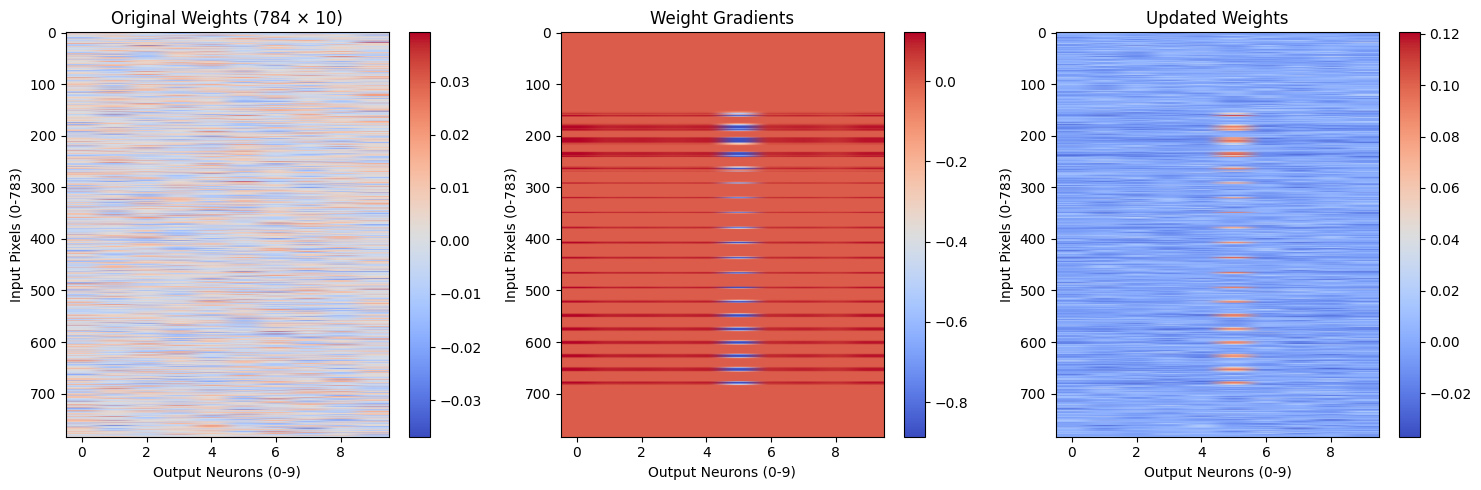

In [29]:
# Visualizing the gradient effect for SINGLE-LAYER network
plt.figure(figsize=(15, 5))

# 1. Original weights visualization
plt.subplot(1, 3, 1)
plt.imshow(weights, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title("Original Weights (784 × 10)")
plt.xlabel("Output Neurons (0-9)")
plt.ylabel("Input Pixels (0-783)")

# 2. Gradient visualization
plt.subplot(1, 3, 2)
plt.imshow(grad_weights, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title("Weight Gradients")
plt.xlabel("Output Neurons (0-9)")
plt.ylabel("Input Pixels (0-783)")

# 3. Updated weights visualization
plt.subplot(1, 3, 3)
plt.imshow(weights_new, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title("Updated Weights")
plt.xlabel("Output Neurons (0-9)")
plt.ylabel("Input Pixels (0-783)")

plt.tight_layout()
plt.savefig("BackPropagation_SingleLayerWeights.svg", format="svg")
plt.show()